In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize
from numpy import loadtxt
import matplotlib
from scipy.optimize import least_squares
from scipy.optimize import curve_fit
matplotlib.rc('xtick', labelsize=20)     
matplotlib.rc('ytick', labelsize=20)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

data = loadtxt('nmri.dat',unpack=True, usecols=[0,1])
x = data[0]
y = data[1]


#iterated
def func(x, c, a, b):
    return c + a *(1-2.0*np.exp(-x/b))

init_vals = [1.0, 1.0, 1.0] 
popt, pcov = curve_fit(func, x, y, p0=init_vals)

print("Iterated Fit:\n",popt,"\n",pcov)

Iterated Fit:
 [ 0.0458854   4.08733916 31.59271843] 
 [[ 3.24760715e-04 -3.39156599e-05  4.17228514e-03]
 [-3.39156599e-05  1.19650044e-04  1.91406683e-04]
 [ 4.17228514e-03  1.91406683e-04  6.35079289e-02]]


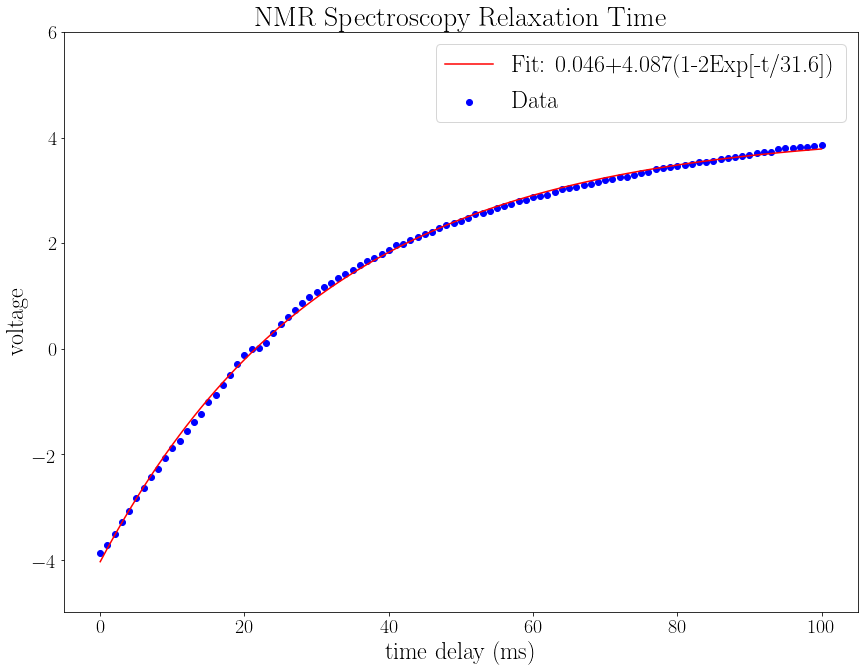

In [2]:
plt.figure()
plt.scatter(x,y,label ='Data',c='blue')
plt.plot(x, func(x,*popt), 
         label='Fit: %1.3f+%1.3f(1-2Exp[-t/%1.1f])' % (popt[0],popt[1],popt[2]), color='red')
plt.xlabel('time delay (ms)', fontsize=24)
plt.ylabel('voltage', fontsize=24)
plt.title('NMR Spectroscopy Relaxation Time', fontsize=28)
plt.legend(loc=0,prop={'size':24})
plt.ylim(-5,6)
fig = plt.gcf()
DPI = fig.get_dpi()
fig.set_size_inches(1024.0/float(DPI),768.0/float(DPI))
plt.savefig('nmri.pdf')
plt.close( 'nmri.pdf')

-3.641415821098448e-07


/Users/christophernewey/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


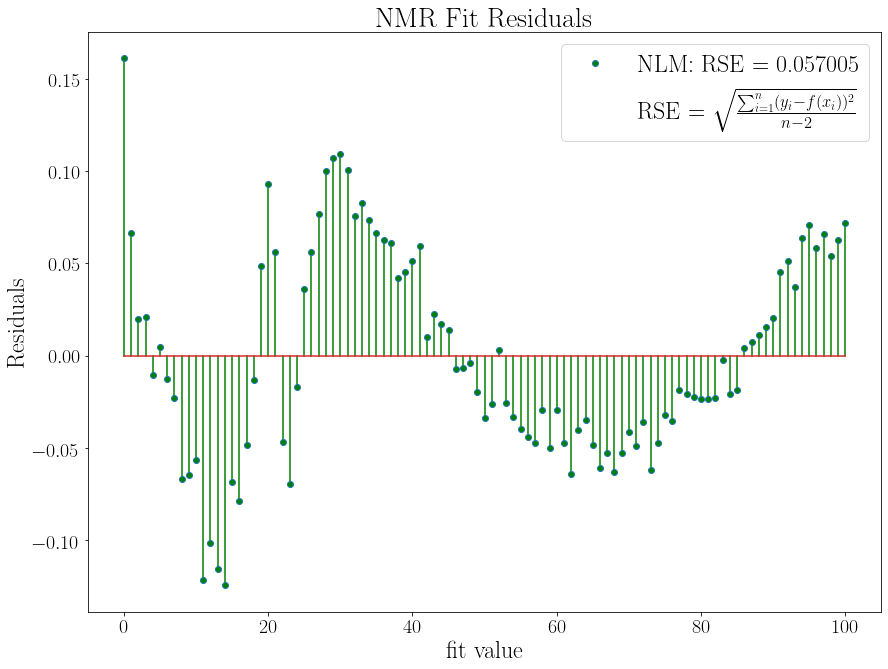

In [3]:
y2 = y-(popt[0]+popt[1]*(1-2.0*np.exp(-x/popt[2])))
print(sum(y2))
rsenlm = np.sqrt(sum(y2**2)/(len(y2) - 2))


fig, ax = plt.subplots()
markerline2, stemlines, _ = plt.stem(x, y2, '-', linefmt='g')
h1 = plt.setp(markerline2, 'markerfacecolor', 'g', label='NLM: RSE = %f' % rsenlm)
h4 = plt.plot([], [], ' ', label="RSE = $\\sqrt{\\frac{\\sum^n_{i=1}(y_i-f(x_i))^2}{n-2}}$")

plt.xlabel('fit value', fontsize=24)
plt.ylabel('Residuals', fontsize=24)
plt.title('NMR Fit Residuals', fontsize=28)

plt.legend(loc=0,prop={'size':24})
fig = plt.gcf()
DPI = fig.get_dpi()
fig.set_size_inches(1024.0/float(DPI),768.0/float(DPI))
plt.savefig('nmrires.pdf')
plt.close( 'nmrires.pdf')